# Introduction
* 중형픽업트럭과 중형SUV, 대형SUV 고객층이 일정수준 겹칠거라 판단되었고, 이에 따라 직접 K-menas Clustering을 진행하면서 **가설**이 일치하는지 확인

In [155]:
import pandas as pd
import urllib.request, json
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
os.getcwd()
%matplotlib inline

In [144]:
from matplotlib import font_manager, rc
font_fname = 'C:\\Windows\\Fonts\\malgun.ttf'     # A font of your choice
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

## 픽업 SPEC

In [2]:
os.getcwd()

'C:\\Users\\kb910\\Google 드라이브\\경배끄10\\인턴\\python_code'

In [6]:
os.chdir('C:\\Users\\kb910\\Google 드라이브\\경배끄10\\인턴\\csv파일\\spec\\픽업트럭')
data = open('mid_pickup_spec.json').read()
spec_data = pd.DataFrame(json.loads(data))

In [24]:
spec_data.columns

Index(['Engine_code', 'baseInvoice', 'baseMSRP', 'city', 'compressionRatio',
       'deliveryCharges', 'drivenWheels', 'gas_type', 'highway', 'horsepower',
       'make_name', 'model_name', 'model_year', 'numOfDoors', 'numberOfSpeeds',
       'options', 'rpm_hp', 'rpm_tq', 'torque', 'transmissionType', 'trim',
       'usedPrivateParty', 'usedTmvRetail', 'usedTradeIn'],
      dtype='object')

In [25]:
spec_data2 = spec_data[['make_name','model_name','baseMSRP','city','highway','horsepower']]

## 픽업 판매량

In [53]:
os.chdir('C:\\Users\\kb910\\Google 드라이브\\경배끄10\\인턴\\csv파일\\판매량')
data = open('final_all_sell(year).json').read()
sale_data = pd.DataFrame(json.loads(data))

In [54]:
sale_data = sale_data[sale_data['GLOBAL_SEGMENT']=='PUP-C']
sale_data = sale_data[sale_data['Y2016'] != 0]
sale_data

,Brand,GLOBAL_MODEL,GLOBAL_SEGMENT,Strategic Group,Y2012,Y2013,Y2014,Y2015,Y2016
237,Toyota,Tacoma,PUP-C,Toyota,141354,159485,155042,179564,191632
33,Chevrolet,Colorado,PUP-C,GM,36840,3412,8003,84430,108725
357,Honda,Ridgeline,PUP-C,Honda,14068,17723,13389,520,23668
399,Nissan,Frontier,PUP-C,Renault-Nissan,55435,62837,74323,62817,86926
54,GMC,Canyon,PUP-C,GM,8735,929,3070,30077,37449


In [55]:
sale_data=sale_data.rename(columns = {'GLOBAL_MODEL':'model_name'})

In [60]:
sale_data.loc[sale_data['model_name']=='Canyon','model_name'] = 'canyon'

In [61]:
sale_data

,Brand,model_name,GLOBAL_SEGMENT,Strategic Group,Y2012,Y2013,Y2014,Y2015,Y2016
237,Toyota,tacoma,PUP-C,Toyota,141354,159485,155042,179564,191632
33,Chevrolet,colorado,PUP-C,GM,36840,3412,8003,84430,108725
357,Honda,ridgeline,PUP-C,Honda,14068,17723,13389,520,23668
399,Nissan,frontier,PUP-C,Renault-Nissan,55435,62837,74323,62817,86926
54,GMC,canyon,PUP-C,GM,8735,929,3070,30077,37449


## 픽업 size

In [19]:
os.chdir('C:\\Users\\kb910\\Google 드라이브\\경배끄10\\인턴\\csv파일\\spec\\픽업트럭')
size_data = pd.read_csv('mid_pickup_size.csv')

In [21]:
size_data=size_data.rename(columns = {'model':'model_name'})
size_data

,make,model_name,base_weight,f_head,f_hip,f_leg,f_shoulder,s_head,s_hip,s_leg,s_shoulder,length,height,width,pass_capa,pass_vol,cargo_space,wheelbase,track_width_front,track_width_rear
0,toyota,tacoma,4125,39.7,57.2,42.9,58.3,34.9,51.7,24.6,56.5,212.3,70.6,75.2,5,107.5,63.2,127.4,63.0,63.2
1,chevrolet,colorado,4290,40.8,55.0,43.2,575.0,36.7,52.2,28.6,57.3,212.5,71.3,75.5,5,105.5,49.4,128.4,62.5,62.4
2,honda,ridgeline,4450,39.8,59.1,40.9,62.0,38.8,56.6,36.7,61.5,210.0,70.8,78.6,5,109.7,33.9,125.2,66.3,66.3
3,nissan,frontier,3830,39.7,55.8,42.2,58.3,36.6,55.0,25.4,54.9,205.5,68.7,72.8,4,101.1,51.2,125.9,61.8,61.8
4,g.mc,canyon,4080,41.4,55.0,45.0,57.5,36.7,52.2,28.6,57.3,212.4,70.3,74.3,4,110.0,49.9,128.3,63.5,63.5


## Table 합치기
* 최종 픽업트럭(사이즈, 판매량, 스펙) Table만들기

In [72]:
size_spec_table = pd.merge(size_data,sale_data, on='model_name')
final_pickup_table = pd.merge(size_spec_table, spec_data2, on='model_name',how='right')

In [73]:
final_pickup_table

,make,model_name,base_weight,f_head,f_hip,f_leg,f_shoulder,s_head,s_hip,s_leg,...,Y2012,Y2013,Y2014,Y2015,Y2016,make_name,baseMSRP,city,highway,horsepower
0,toyota,tacoma,4125,39.7,57.2,42.9,58.3,34.9,51.7,24.6,...,141354,159485,155042,179564,191632,toyota,41215.0,17.0,20.0,278.0
1,toyota,tacoma,4125,39.7,57.2,42.9,58.3,34.9,51.7,24.6,...,141354,159485,155042,179564,191632,toyota,32195.0,19.0,24.0,278.0
2,toyota,tacoma,4125,39.7,57.2,42.9,58.3,34.9,51.7,24.6,...,141354,159485,155042,179564,191632,toyota,35770.0,18.0,23.0,278.0
3,toyota,tacoma,4125,39.7,57.2,42.9,58.3,34.9,51.7,24.6,...,141354,159485,155042,179564,191632,toyota,33220.0,18.0,23.0,278.0
4,toyota,tacoma,4125,39.7,57.2,42.9,58.3,34.9,51.7,24.6,...,141354,159485,155042,179564,191632,toyota,32195.0,19.0,24.0,278.0
5,toyota,tacoma,4125,39.7,57.2,42.9,58.3,34.9,51.7,24.6,...,141354,159485,155042,179564,191632,toyota,35770.0,18.0,23.0,278.0
6,toyota,tacoma,4125,39.7,57.2,42.9,58.3,34.9,51.7,24.6,...,141354,159485,155042,179564,191632,toyota,26100.0,19.0,21.0,159.0
7,toyota,tacoma,4125,39.7,57.2,42.9,58.3,34.9,51.7,24.6,...,141354,159485,155042,179564,191632,toyota,29735.0,19.0,22.0,159.0
8,toyota,tacoma,4125,39.7,57.2,42.9,58.3,34.9,51.7,24.6,...,141354,159485,155042,179564,191632,toyota,30645.0,19.0,24.0,278.0
9,toyota,tacoma,4125,39.7,57.2,42.9,58.3,34.9,51.7,24.6,...,141354,159485,155042,179564,191632,toyota,29155.0,19.0,24.0,278.0


In [87]:
final_pickup_table['MPG_avg'] = (final_pickup_table['city'] + final_pickup_table['highway']) /2

In [83]:
final_pickup_table[final_pickup_table['model_name']=='canyon'].index

Int64Index([ 94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
            107, 108, 109, 110, 111, 112, 113, 114],
           dtype='int64')

In [88]:
final_pickup_table2 = final_pickup_table.loc[[0,32,53,65,94]]
final_pickup_table2

,make,model_name,base_weight,f_head,f_hip,f_leg,f_shoulder,s_head,s_hip,s_leg,...,Y2013,Y2014,Y2015,Y2016,make_name,baseMSRP,city,highway,horsepower,MPG_avg
0,toyota,tacoma,4125,39.7,57.2,42.9,58.3,34.9,51.7,24.6,...,159485,155042,179564,191632,toyota,41215.0,17.0,20.0,278.0,18.5
32,chevrolet,colorado,4290,40.8,55.0,43.2,575.0,36.7,52.2,28.6,...,3412,8003,84430,108725,chevrolet,41625.0,16.0,18.0,308.0,17.0
53,honda,ridgeline,4450,39.8,59.1,40.9,62.0,38.8,56.6,36.7,...,17723,13389,520,23668,honda,29475.0,19.0,26.0,280.0,22.5
65,nissan,frontier,3830,39.7,55.8,42.2,58.3,36.6,55.0,25.4,...,62837,74323,62817,86926,nissan,18390.0,19.0,23.0,152.0,21.0
94,g.mc,canyon,4080,41.4,55.0,45.0,57.5,36.7,52.2,28.6,...,929,3070,30077,37449,gmc,28330.0,18.0,25.0,308.0,21.5


In [94]:
final_pickup_table2 = final_pickup_table2.sort_values('model_name')
final_pickup_table2

,make,model_name,base_weight,f_head,f_hip,f_leg,f_shoulder,s_head,s_hip,s_leg,...,Y2013,Y2014,Y2015,Y2016,make_name,baseMSRP,city,highway,horsepower,MPG_avg
94,g.mc,canyon,4080,41.4,55.0,45.0,57.5,36.7,52.2,28.6,...,929,3070,30077,37449,gmc,28330.0,18.0,25.0,308.0,21.5
32,chevrolet,colorado,4290,40.8,55.0,43.2,575.0,36.7,52.2,28.6,...,3412,8003,84430,108725,chevrolet,41625.0,16.0,18.0,308.0,17.0
65,nissan,frontier,3830,39.7,55.8,42.2,58.3,36.6,55.0,25.4,...,62837,74323,62817,86926,nissan,18390.0,19.0,23.0,152.0,21.0
53,honda,ridgeline,4450,39.8,59.1,40.9,62.0,38.8,56.6,36.7,...,17723,13389,520,23668,honda,29475.0,19.0,26.0,280.0,22.5
0,toyota,tacoma,4125,39.7,57.2,42.9,58.3,34.9,51.7,24.6,...,159485,155042,179564,191632,toyota,41215.0,17.0,20.0,278.0,18.5


In [113]:
for x, y in enumerate(final_pickup_table2['model_name']):
    final_pickup_table2.loc[final_pickup_table2['model_name']==y,'MPG_avg'] = round(final_pickup_table.groupby('model_name')['MPG_avg'].mean().sort_index()[x],0)

In [114]:
final_pickup_table.groupby('model_name')['baseMSRP'].mean().sort_index()[0]

33434.761904761908

In [122]:
final_pickup_table2.columns

Index(['make', 'model_name', 'base_weight', 'f_head', 'f_hip', 'f_leg',
       'f_shoulder', 's_head', 's_hip', 's_leg', 's_shoulder', 'length',
       'height', 'width', 'pass_capa', 'pass_vol', 'cargo_space', 'wheelbase',
       'track_width_front', 'track_width_rear', 'Brand', 'GLOBAL_SEGMENT',
       'Strategic Group', 'Y2012', 'Y2013', 'Y2014', 'Y2015', 'Y2016',
       'make_name', 'baseMSRP', 'city', 'highway', 'horsepower', 'MPG_avg'],
      dtype='object')

In [116]:
os.chdir('C:\\Users\\kb910\\Google 드라이브\\경배끄10\\인턴\\csv파일\\spec\\픽업트럭')

'C:\\Users\\kb910\\Google 드라이브\\경배끄10\\인턴\\csv파일\\판매량'

In [119]:
final_pickup_table.to_csv('prev_final_pickup_all.csv')
final_pickup_table.to_json('prev_final_pickup_all.json')

## 픽업과 SUV의 Segment 보기

In [139]:
## 군집화시작

from sklearn.cluster import KMeans
import mglearn


In [164]:
os.chdir('C:\\Users\\kb910\\Google 드라이브\\경배끄10\\인턴\\csv파일\\spec\\픽업트럭')
final_pickup_table2 = pd.read_csv('final_pickup_all.csv')

In [168]:
os.chdir('C:\\Users\\kb910\\Google 드라이브\\경배끄10\\인턴\\csv파일\\spec\\Segment관련_SUV')
suv_table = open('real_final_suv_seg3.json').read()
suv_table = pd.DataFrame(json.loads(suv_table))
SUV_D_cluster1 = suv_table[suv_table["Segment"] == 'Seg1']
SUV_D_cluster2 = suv_table[suv_table["Segment"] == 'Seg2']
SUV_D_cluster = pd.concat([SUV_D_cluster1, SUV_D_cluster2])

In [169]:
SUV_D_cluster = SUV_D_cluster[['Brand', 'GLOBAL_SEGMENT', 'MPG_avg', 'Y2012',
       'Y2013', 'Y2014', 'Y2015', 'Y2016', 'baseMSRP', 'base_weight',
       'cargo_space', 'f_head', 'f_hip', 'f_leg', 'f_shoulder',
       'height', 'horsepower', 'length', 'make_name', 'model_name',
       'pass_capa', 'pass_vol', 's_head', 's_hip', 's_leg', 's_shoulder',
       'track_width_front', 'track_width_rear', 'wheelbase', 'width']]

In [170]:
final_pickup_table2 = final_pickup_table2[['Brand', 'GLOBAL_SEGMENT', 'MPG_avg', 'Y2012',
       'Y2013', 'Y2014', 'Y2015', 'Y2016', 'baseMSRP', 'base_weight',
       'cargo_space', 'f_head', 'f_hip', 'f_leg', 'f_shoulder',
       'height', 'horsepower', 'length', 'make_name', 'model_name',
       'pass_capa', 'pass_vol', 's_head', 's_hip', 's_leg', 's_shoulder',
       'track_width_front', 'track_width_rear', 'wheelbase', 'width']]

In [171]:
truck_suv_table = pd.concat([SUV_D_cluster, final_pickup_table2])

In [172]:
truck_suv_table['interior'] = truck_suv_table[['pass_capa', 'f_head', 'f_leg','cargo_space','pass_vol',
       'f_shoulder', 'f_hip', 's_head', 's_leg', 's_shoulder', 's_hip']].sum(axis=1)

truck_suv_table['exterior'] = truck_suv_table[['wheelbase', 'length', 'width', 'height',
       'track_width_front', 'track_width_rear']].sum(axis=1)

In [173]:
truck_suv_table['interior_weight'] = truck_suv_table['interior'] + truck_suv_table['base_weight']
truck_suv_table['full_size'] = truck_suv_table['interior'] + truck_suv_table['exterior']

In [174]:
feature = ['pass_capa', 'f_head', 'f_leg','f_shoulder', 'f_hip', 's_head', 's_leg', 's_shoulder', 's_hip',
        'wheelbase', 'length', 'width', 'height','track_width_front', 'track_width_rear',
           'interior','exterior','cargo_space','pass_vol','baseMSRP','full_size']
cluster_value = truck_suv_table[feature].values

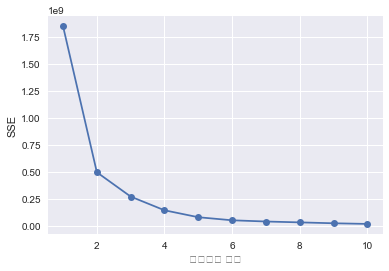

In [175]:
def elbow(x):
    sse = []
    for i in range(1,11):
        km=KMeans(n_clusters=i, init='k-means++', random_state=0)
        km.fit(x)
        sse.append(km.inertia_)
        
    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('클러스터 개수')
    plt.ylabel('SSE')
    plt.show

elbow(cluster_value)

In [176]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(cluster_value)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [177]:
truck_suv_table.index = [x for x in range(len(truck_suv_table))]

In [178]:
truck_suv_table[truck_suv_table['model_name']=='santa-fe-sport'].index

Int64Index([3], dtype='int64')

In [179]:
cluster_value[0][20]

1184.6318000000001

In [181]:
from matplotlib import font_manager, rc
font_fname = 'C:\\Windows\\Fonts\\malgun.ttf'     # A font of your choice
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

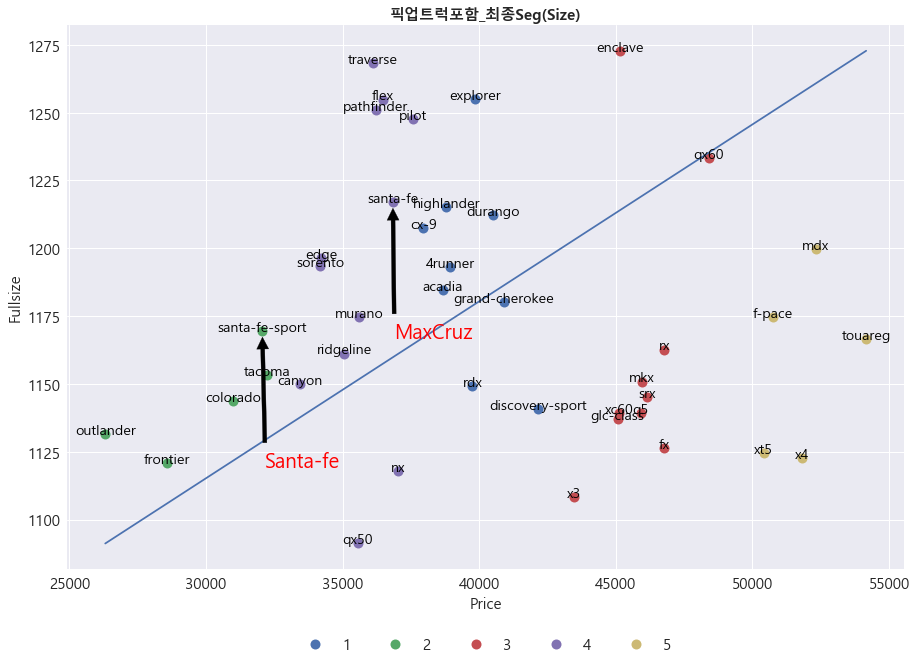

In [183]:
labels = ['1', '2', '3', '4', '5']
plot_x = pd.DataFrame(cluster_value)[19]
plot_y = pd.DataFrame(cluster_value)[20]


fig, ax = plt.subplots(1, figsize=(15,10))
mglearn.discrete_scatter(cluster_value[:, 19], cluster_value[:, 20], kmeans.labels_, markers='o')


for i, txt in enumerate(truck_suv_table['model_name']):
    ax.annotate(txt, (cluster_value[i][19],cluster_value[i][20]), color='black', 
                size=14, ha='center')

plt.xlabel('Price', fontsize=15)
plt.ylabel('Fullsize', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
ax.legend(labels,loc='upper center', bbox_to_anchor=(0.5, -0.10),
          fancybox=True, shadow=True, ncol=6, prop={'size':15})

ax.annotate('MaxCruz', xy=(cluster_value[2][19], cluster_value[2][20]), xytext=(cluster_value[2][19]+50, cluster_value[2][20]-50),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize=20, color='red')

ax.annotate('Santa-fe', xy=(cluster_value[3][19], cluster_value[3][20]), xytext=(cluster_value[3][19]+100, cluster_value[3][20]-50),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize=20, color='red')


plt.title('픽업트럭포함_최종Seg(Size)', fontsize=15, weight='bold')

plt.plot([plot_x.min(),plot_x.max()],[plot_y.min(),plot_y.max()])

plt.savefig('픽업트럭포함_최종Seg(Size)')

## 가격-마력

In [184]:
D_price_hp = truck_suv_table[['baseMSRP','horsepower']].values

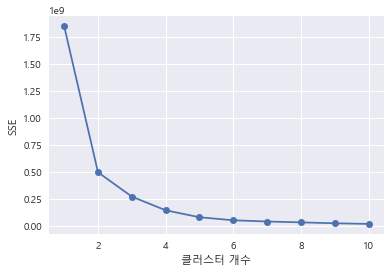

In [185]:
def elbow(x):
    sse = []
    for i in range(1,11):
        km=KMeans(n_clusters=i, init='k-means++', random_state=0)
        km.fit(x)
        sse.append(km.inertia_)
        
    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('클러스터 개수')
    plt.ylabel('SSE')
    plt.show

elbow(D_price_hp)

In [186]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(D_price_hp)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [188]:
truck_suv_table[truck_suv_table['model_name']=='santa-fe-sport'].index

Int64Index([3], dtype='int64')

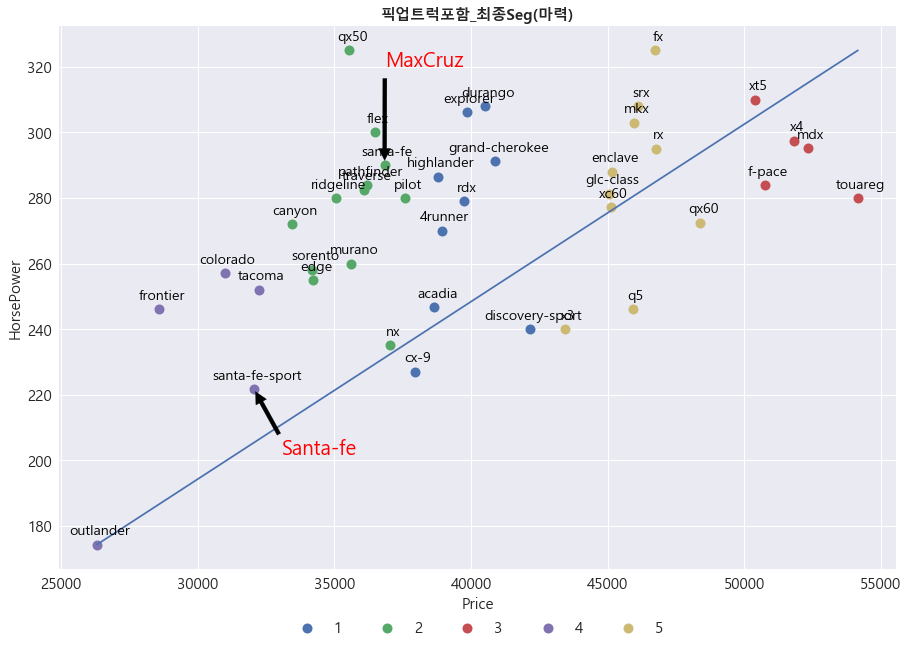

In [191]:
labels = ['1', '2', '3', '4', '5']
plot_x = pd.DataFrame(D_price_hp)[0]
plot_y = pd.DataFrame(D_price_hp)[1]

fig, ax = plt.subplots(1, figsize=(15,10))
mglearn.discrete_scatter(D_price_hp[:, 0], D_price_hp[:, 1], kmeans.labels_, markers='o')


for i, txt in enumerate(truck_suv_table['model_name']):
    ax.annotate(txt, (D_price_hp[i][0]+100,D_price_hp[i][1]+3), color='black', 
                size=14, ha='center')

plt.xlabel('Price', fontsize=15)
plt.ylabel('HorsePower', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
ax.legend(labels,loc='upper center', bbox_to_anchor=(0.5, -0.07),
          fancybox=True, shadow=True, ncol=6, prop={'size':15})

ax.annotate('MaxCruz', xy=(D_price_hp[2][0], D_price_hp[2][1]), xytext=(D_price_hp[2][0]+10, D_price_hp[2][1]+30),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize=20, color='red')

ax.annotate('Santa-fe', xy=(D_price_hp[3][0], D_price_hp[3][1]), xytext=(D_price_hp[3][0]+1000, D_price_hp[3][1]-20),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize=20, color='red')

plt.plot([plot_x.min(),plot_x.max()],[plot_y.min(),plot_y.max()])
plt.title('픽업트럭포함_최종Seg(마력)', fontsize=15, weight='bold')
plt.savefig('픽업트럭포함_최종Seg(마력)')
plt.show()


## 가격-연비

In [201]:
D_price_mpg =truck_suv_table[['baseMSRP','MPG_avg']].values

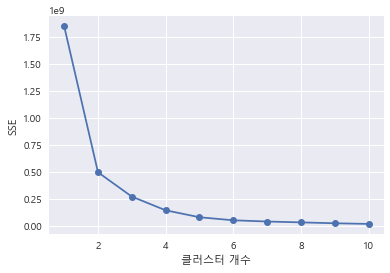

In [202]:
def elbow(x):
    sse = []
    for i in range(1,11):
        km=KMeans(n_clusters=i, init='k-means++', random_state=0)
        km.fit(x)
        sse.append(km.inertia_)
        
    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('클러스터 개수')
    plt.ylabel('SSE')
    plt.show

elbow(D_price_mpg)

In [203]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(D_price_mpg)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

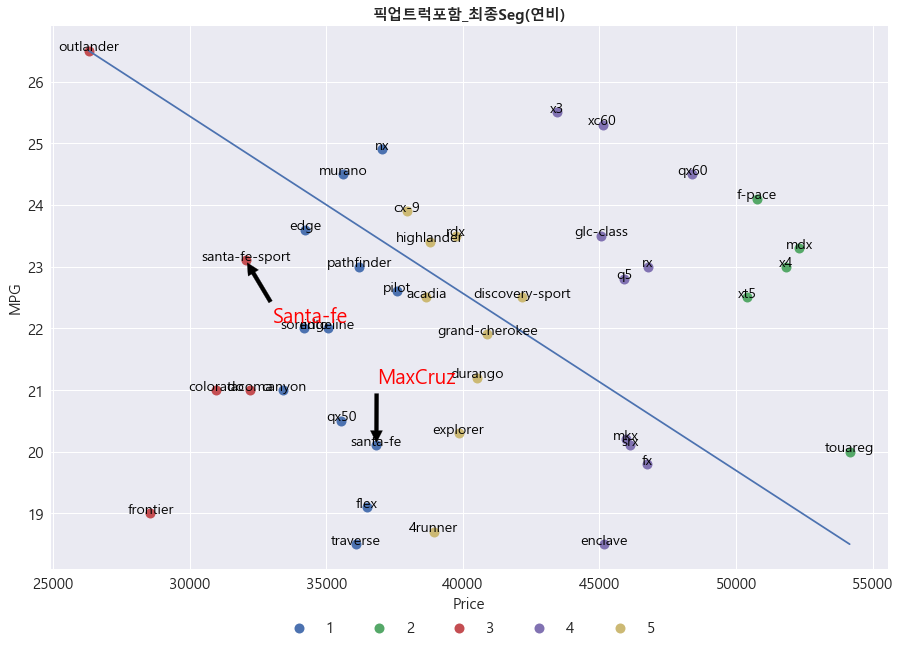

In [204]:
labels = ['1', '2', '3', '4', '5']
plot_x = pd.DataFrame(D_price_mpg)[0]
plot_y = pd.DataFrame(D_price_mpg)[1]


fig, ax = plt.subplots(1, figsize=(15,10))
mglearn.discrete_scatter(D_price_mpg[:, 0], D_price_mpg[:, 1], kmeans.labels_, markers='o')


for i, txt in enumerate(truck_suv_table['model_name']):
    ax.annotate(txt, (D_price_mpg[i][0],D_price_mpg[i][1]), color='black', 
                size=14, ha='center')

plt.xlabel('Price', fontsize=15)
plt.ylabel('MPG', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
ax.legend(labels,loc='upper center', bbox_to_anchor=(0.5, -0.07),
          fancybox=True, shadow=True, ncol=6, prop={'size':15})

ax.annotate('MaxCruz', xy=(D_price_mpg[2][0], D_price_mpg[2][1]), xytext=(D_price_mpg[2][0]+10, D_price_mpg[2][1]+1),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize=20, color='red')

ax.annotate('Santa-fe', xy=(D_price_mpg[3][0], D_price_mpg[3][1]), xytext=(D_price_mpg[3][0]+1000, D_price_mpg[3][1]-1),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize=20, color='red')


plt.title('픽업트럭포함_최종Seg(연비)', fontsize=15, weight='bold')

plt.plot([plot_x.min(),plot_x.max()],[plot_y.max(),plot_y.min()])

plt.savefig('픽업트럭포함_최종Seg(연비)')